<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [7]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
1,2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
3,2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
4,2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...,...
2013,2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2014,2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2015,2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813
2016,2020-01-08,297.160004,304.439911,297.156006,303.190002,299.284088,33090946


In [9]:
data.head(), data.tail()

(         Date       Open       High        Low      Close  Adj Close    Volume
 0  2012-01-03  58.500000  58.928570  58.428570  58.747143  56.011238  75564699
 1  2012-01-04  58.599998  59.240002  58.468571  59.062859  56.312252  65061108
 2  2012-01-05  59.278572  59.792858  58.952858  59.718571  56.937424  67816805
 3  2012-01-06  59.967140  60.392857  59.888573  60.342857  57.532646  79596412
 4  2012-01-09  60.788570  61.107143  60.192856  60.247143  57.441391  98505792,
             Date        Open        High  ...       Close   Adj Close    Volume
 2013  2020-01-03  297.149994  300.579987  ...  297.429993  293.598297  36633878
 2014  2020-01-06  293.790009  299.959991  ...  299.799988  295.937744  29644644
 2015  2020-01-07  299.839996  300.899994  ...  298.390015  294.545959  26207813
 2016  2020-01-08  297.160004  304.439911  ...  303.190002  299.284088  33090946
 2017  2020-01-09  307.234985  310.429993  ...  309.630005  305.641113  42621542
 
 [5 rows x 7 columns])

In [71]:
open_price = data.iloc[:,1:2]
train_set = open_price[:2000].values
test_set = open_price[2000:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2000, 1)
Test size: (18, 1)


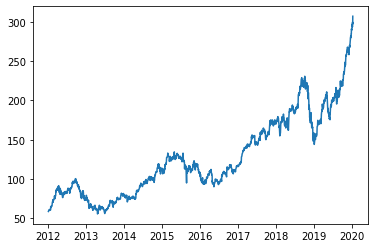

In [72]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price,fmt='-')
plt.savefig("Bitcoin.jpg")

In [73]:
len(data)

2018

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import dataset

#data_end = int(np.floor(1*(data.shape[0])))
data_end = 2018
#train = data[0:data_end]['Adj Close']
train = data[0:data_end]['Adj Close']
train =train.values.reshape(-1)
#test = data[data_end:]['Adj Close'].values.reshape(-1)
test = data[data_end:]['Adj Close'].values.reshape(-1)
date_test = data[data_end:]['Date'].values.reshape(-1)
print("Train size: ",train.shape)
print("Test size:",test.shape)

Train size:  (2018,)
Test size: (0,)


In [75]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [79]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,2018,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,2018)
y_train = x_train.reshape(-1,1)

#train_set_scaled = scaler.fit_transform(train_set)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,2018)
y_test = y_test.reshape(-1,1)

#x_test = scaler.fit_transform(train_set)
x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)


date_test = date_test.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = y_train.reshape(-1,1)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test)
y_test = scaler.fit_transform(y_test)

date_test = date_test.reshape(-1,1)

In [80]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 202 doan 1
n_input = 2018
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [81]:
model.compile(optimizer='adam', loss='mse')

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 2018, 50)          10400     
                                                                 
 dropout_9 (Dropout)         (None, 2018, 50)          0         
                                                                 
 lstm_10 (LSTM)              (None, 2018, 50)          20200     
                                                                 
 dropout_10 (Dropout)        (None, 2018, 50)          0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [83]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20


50/54 [==========================>...] - ETA: 0s - loss: 0.0427WARNING:tensorflow:Model was constructed with shape (None, 2018, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 2018, 1), dtype=tf.float32, name='lstm_9_input'), name='lstm_9_input', description="created by layer 'lstm_9_input'"), but it was called on an input with incompatible shape (None, 1, 1).


54/54 [==============================] - 7s 30ms/step - loss: 0.0413 - val_loss: 0.1393
Epoch 2/20
54/54 [==============================] - 0s 9ms/step - loss: 0.0180 - val_loss: 0.0996
Epoch 3/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0015
Epoch 4/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 7/20
54/54 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 7.5289e-04
Epoch 9/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 2.4215e-04
Epoch 10/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 1.2486e-04
Epoch 11/20
54/54

INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


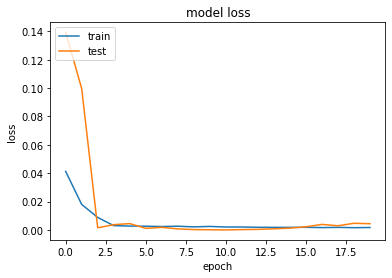

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

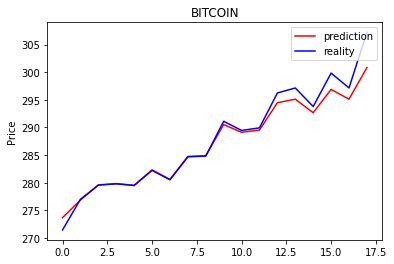

In [85]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)
#test_output = model.predict(x_train)
# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:2000], color='r')
plt.plot(test_2[:2000] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [86]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[273.68845]
 [276.8629 ]
 [279.60132]
 [279.8419 ]
 [279.52792]
 [282.334  ]
 [280.60025]
 [284.75632]
 [284.88132]
 [290.5337 ]
 [289.12494]
 [289.5299 ]
 [294.48346]
 [295.12054]
 [292.66977]
 [296.88602]
 [295.12744]
 [300.82877]]
[[271.459991]
 [277.      ]
 [279.570007]
 [279.799988]
 [279.5     ]
 [282.230011]
 [280.529999]
 [284.690002]
 [284.820007]
 [291.119995]
 [289.459991]
 [289.929993]
 [296.23999 ]
 [297.149994]
 [293.790009]
 [299.839996]
 [297.160004]
 [307.234985]]


In [87]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

1/1 [==============================] - 1s 1s/step - loss: 0.0030
Test Score 0.002951047383248806


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.054324
